In [1]:
from fastai.datasets import Config
from fastai.tabular import *
from fastai.utils.collect_env import show_install
import zipfile
import os

show_install()



```text
=== Software === 
python        : 3.7.1
fastai        : 1.0.46
fastprogress  : 0.1.19
torch         : 1.0.1.post2
nvidia driver : 410.72
torch cuda    : 10.0.130 / is available
torch cudnn   : 7402 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 7611MB | Tesla P4

=== Environment === 
platform      : Linux-4.9.0-8-amd64-x86_64-with-debian-9.8
distro        : #1 SMP Debian 4.9.130-2 (2018-10-27)
conda env     : base
python        : /opt/anaconda3/bin/python
sys.path      : /home/jupyter/Projects/kaggle_competitions
/opt/anaconda3/lib/python37.zip
/opt/anaconda3/lib/python3.7
/opt/anaconda3/lib/python3.7/lib-dynload

/opt/anaconda3/lib/python3.7/site-packages
/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions
/home/jupyter/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be instal

# Competiton files setup

In [2]:
data_path = Config.data_path()/'santander'
competition_name = 'santander-customer-transaction-prediction'
data_path.mkdir(parents=True, exist_ok=True)
data_path

PosixPath('/home/jupyter/.fastai/data/santander')

In [3]:
!kaggle competitions files -c {competition_name}

name                    size  creationDate         
---------------------  -----  -------------------  
train.csv              288MB  2019-02-12 01:02:37  
sample_submission.csv    3MB  2019-02-12 00:59:50  
test.csv               288MB  2019-02-12 01:02:37  


In [4]:
!kaggle competitions download -c {competition_name} -p {data_path}

 86%|████████▌ | 105M/122M [00:01<00:00, 82.8MB/s] 
100%|██████████| 122M/122M [00:01<00:00, 101MB/s] 
  0%|          | 0.00/463k [00:00<?, ?B/s]
100%|██████████| 463k/463k [00:00<00:00, 148MB/s]
 82%|████████▏ | 100M/122M [00:01<00:00, 54.5MB/s] 
100%|██████████| 122M/122M [00:01<00:00, 87.1MB/s]


In [5]:
data_path.ls()

[PosixPath('/home/jupyter/.fastai/data/santander/test.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/santander/train.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/santander/sample_submission.csv.zip')]

In [6]:
# Need to unzip all files in the folder
def unzip_and_remove(file_name):
    print(f"Unziping {file_name}")
    
    with zipfile.ZipFile(data_path/file_name,"r") as zip_ref:
        zip_ref.extractall(data_path)
        
    print(f"Done. Deleting {file_name}")
    os.remove(data_path/file_name)
    print("Done")

unzip_and_remove('sample_submission.csv.zip')
unzip_and_remove('train.csv.zip')
unzip_and_remove('test.csv.zip')

Unziping sample_submission.csv.zip
Done. Deleting sample_submission.csv.zip
Done
Unziping train.csv.zip
Done. Deleting train.csv.zip
Done
Unziping test.csv.zip
Done. Deleting test.csv.zip
Done


In [7]:
data_path.ls()

[PosixPath('/home/jupyter/.fastai/data/santander/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/santander/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/santander/sample_submission.csv')]

# Data exploration

In [8]:
train_df = pd.read_csv(data_path/'train.csv')
test_df = pd.read_csv(data_path/'test.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
print(f"Train length: {len(train_df)}")
print(f"Test length: {len(test_df)}")

Train length: 200000
Test length: 200000


In [11]:
# Only for demonstration purposes - not a valid test set
sample_submission_df = pd.read_csv(data_path/'sample_submission.csv')
sample_submission_df.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


# Final data preparation

In [12]:
# Limit nbr of samples for experimentation; this cell needs to be commented during actual training
# train_df = train_df.iloc[:500].copy()
# test_df = test_df.iloc[:500].copy()

In [13]:
procs = [FillMissing, Normalize] # preprocessing pipeline

In [14]:
dep_var = 'target' # Variable to predict

final_train_df = train_df.drop(columns=['ID_code'])
final_test_df = test_df.drop(columns=['ID_code'])

# Looks like all parameters are continuous so there is no need to split
# Need to explicitly set cont_vars because TabularList doesn't assume that 
# columns are continuous if they are no categorical or dependant (TabularDataBunch has this feature) 
cont_vars = list(final_test_df) 

In [15]:
# Will treat all parameters as continuous
test = TabularList.from_df(final_test_df, path=data_path)

data = (TabularList
        .from_df(final_train_df, path=data_path, cont_names=cont_vars, procs=procs)
        .random_split_by_pct()
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch()
       )

In [16]:
data.show_batch()

var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0.2004,0.2960,1.0500,-0.0673,-0.4089,0.6711,-0.4069,1.0217,1.0263,0.6565,1.5268,0.8167,1.2593,-2.3043,-0.8080,-1.3835,-0.6073,-1.5901,0.3231,0.5643,-1.6583,-0.8125,0.3188,0.5817,-0.6850,0.5497,-0.2345,0.5022,0.9414,-0.3996,-1.4985,-0.8241,0.7920,-1.3404,0.6617,1.0981,-0.5647,-0.2710,1.6160,-0.0882,-0.9113,1.6526,0.9622,0.7152,0.5417,0.5763,0.4293,0.8946,0.6250,2.2653,2.2440,1.5417,-0.3654,-0.6768,0.7735,0.2811,1.1062,-0.9019,0.0615,-1.4081,1.2150,0.4438,0.4672,-0.1638,0.7003,0.5682,-1.3287,0.6661,-1.7397,-0.7639,1.4584,0.8320,-1.8564,-1.1250,-0.8005,1.2604,0.2534,-1.5352,-1.1059,0.2897,0.4151,0.7609,1.0571,1.0844,-0.7478,0.8996,1.1136,1.0509,0.8349,-1.5914,-0.9096,0.1843,-0.7029,0.5746,1.0334,-1.4181,-0.7558,-0.2828,-0.0429,0.7651,-0.8473,0.2035,-1.0748,-0.5539,-0.6397,-1.1864,1.9205,-0.8207,0.6054,0.3993,-0.8383,0.7457,0.3988,-0.4939,0.7405,-1.3268,-1.4345,-2.1522,1.4496,1.2063,-0.4232,-1.1497,-0.4102,-0.7433,-0.4875,1.8793,0.1925,0.6663,1.7575,-0.2407,-0.8184,0.3340,0.8759,-1.1183,-0.2040,-0.0735,0.7979,-0.9199,1.5735,0.3515,-1.4248,0.8057,0.4436,0.5146,0.3123,-0.8881,0.9007,-0.9491,-0.0738,0.1843,0.0828,0.8462,0.7438,0.8926,0.5028,0.9767,-1.2251,0.1578,1.2172,-1.5648,-0.8329,1.5176,-1.2142,-0.7337,1.0021,0.7319,-0.0876,-0.0788,-1.1800,-1.2143,1.4788,-1.5164,0.7998,-1.5400,-0.6240,-1.2522,-0.3479,-0.7497,0.1784,0.2752,0.2008,-2.4512,0.5492,0.8144,-0.0356,-0.6370,1.0049,1.0778,0.7149,0.8001,1.3105,-1.9609,-0.0544,1.6340,0.0989,-0.5978,0.9137,1.6811,0.0923,-0.3148,0
0.9286,-0.2883,1.4299,-0.2120,-1.8992,1.2715,0.0480,2.0955,1.1153,-0.6978,-1.1431,2.4766,1.0589,-0.8651,-1.6954,0.0970,0.3107,0.0909,0.3658,-1.3475,0.3620,0.4045,-1.0535,1.5327,0.5691,-0.4653,2.7313,0.4084,1.4889,1.1097,-0.9927,-0.5094,0.1306,0.4244,0.9882,-1.9270,-1.8869,-0.8472,0.9364,1.1260,0.9683,-0.6809,1.4682,-1.3367,0.8405,-1.3397,1.1063,-0.2483,-1.7031,1.6028,-0.4281,-0.7337,-0.4647,-0.2542,-0.5390,-0.3629,-0.3498,0.0249,0.0186,-0.8806,-0.6318,-0.5348,0.4619,-0.1843,0.3385,2.0361,0.6795,-0.3041,0.2924,1.5207,0.1005,0.0536,2.0631,0.4937,-0.9092,0.2300,0.7043,-1.2001,1.1163,0.1563,-0.8255,1.8838,-1.7237,0.6130,-0.5589,0.0601,0.5435,-0.1335,-0.2984,1.4063,0.7600,-1.0320,0.7916,-0.7669,-1.8521,-0.0174,1.6987,-0.2390,-0.0797,0.1782,0.5700,1.1371,0.5642,0.0028,0.1157,1.0193,-0.5381,2.2742,1.0723,0.8076,1.9790,-0.9355,1.4744,-0.0412,-0.5390,1.6600,-0.0515,1.2859,-1.7301,-0.5201,-0.3564,0.4341,1.7833,1.0907,0.4968,-0.8202,0.5433,-1.6767,-0.8337,-0.4289,2.1957,-0.4143,-1.2264,0.4838,-1.1867,0.5103,

# Defining the model

In [29]:
learn = tabular_learner(data, layers=[1000, 600, 300, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


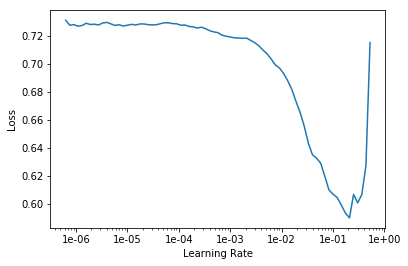

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(10, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.237597,0.263988,0.903300,00:17
2,0.255908,6516.097168,0.910625,00:17
3,0.253611,31402.726562,0.906950,00:18
4,0.229207,60700.609375,0.909600,00:18
5,0.245743,3018.574707,0.909850,00:19
6,0.240547,4602.472656,0.906050,00:18
7,0.219450,590.239319,0.910325,00:18
8,0.237585,1031.675659,0.907750,00:18
9,0.224919,217.811005,0.906675,00:18
10,0.209849,182.484268,0.905650,00:18


In [20]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


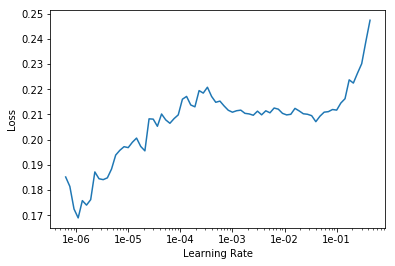

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(3, 8e-4)

epoch,train_loss,valid_loss,accuracy,time
1,0.217947,27.357088,0.906675,00:18
2,0.214619,36.071857,0.905950,00:18
3,0.194425,56.758682,0.907700,00:17


In [23]:
learn.save('state-2')

# Final prediction and submission to Kaggle

In [34]:
preds, _ = learn.get_preds(DatasetType.Test)
labels = np.argmax(preds, 1)
assert(len(test_df) == len(labels))

In [35]:
submission_df = pd.DataFrame({'ID_code': test_df['ID_code'], 'target': labels})

In [36]:
submission_df.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [37]:
submission_df.to_csv(data_path/'submission.csv', index=False)

In [38]:
# Only 3 submission allowed per day!
!kaggle competitions submit {competition_name} -f {data_path/'submission.csv'} -m "Using layers: [1000, 600, 300, 100]"

100%|██████████| 2.56M/2.56M [00:03<00:00, 797kB/s]
Successfully submitted to Santander Customer Transaction Prediction